In [1]:
#imports
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#Loading the data
data = np.loadtxt('faces.dat')

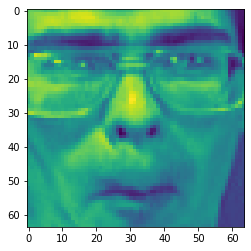

In [3]:
#3A)
#Displaying and reshaping the 200th image 

#Getting 200th image, reshaping, rotating
picture = data[199].reshape((64,64)).transpose()

#plotting image
imgplot = plt.imshow(picture)
valueMean = data.mean(axis=1)

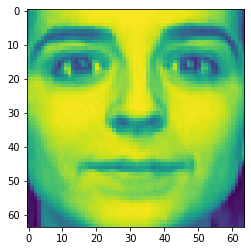

In [4]:
#3B) 

#Subtracting mean from image
data = data - valueMean[:, np.newaxis]

#Printing image after removing mean
picture2 = data[99].reshape((64,64)).transpose()
imgplot = plt.imshow(picture2)

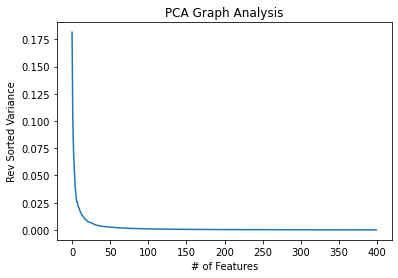

In [17]:
#3C)
#Building a covariance matrix
covarianceMatrix = PCA(n_components = 400)
covarianceMatrix.fit(data)
var = covarianceMatrix.explained_variance_ratio_ 

arraySort = np.sort(var)[::-1]

#Displaying figure, labeling sides
plt.figure()
plt.ylabel('Rev Sorted Variance')
plt.xlabel('# of Features')
plt.title('PCA Graph Analysis')
plt.plot(arraySort)

In [ ]:
#3D) 
#he 400th feature has no valuable information for the PCA. Meaning last eiganvalue is min, no variance is captured by the feature.

In [20]:
#3E)
for z in range(1, arraySort.shape[0]):
  if abs(arraySort[z] - arraySort[z-1]) <= 0.00005:
      print("Index values stop increasing at", z-1,)
      break
    
#The majority of variance is in the first 34 features. The large dropoff in eigen values would make the 34th point a good cutoff. 

Index values stop increasing at 34


Components:  (400, 4096)


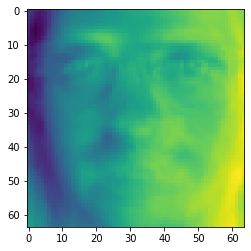

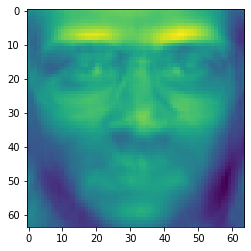

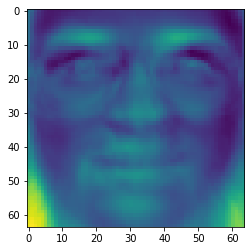

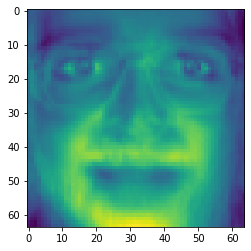

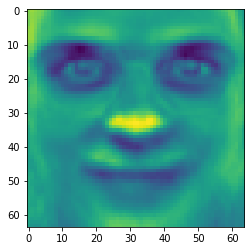

In [16]:
#3F) 
print('Components: ', covarianceMatrix.components_.shape)

# plotting data - components ordered by sklearn
for i in range(5):
  vector =covarianceMatrix.components_[i,:]
  component = vector.reshape((64,64)).transpose()
  plt.figure()
  imgplot = plt.imshow(component)
  plt.show()

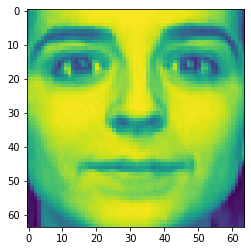

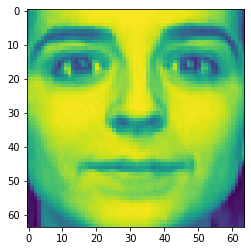

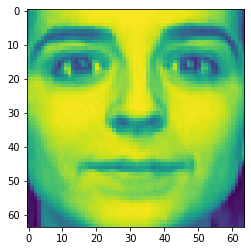

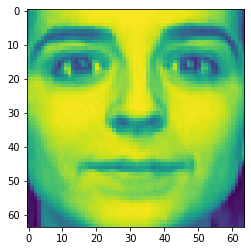

In [18]:
#G)

#Getting 10,20,200,399 principal components
vals = [9,99,199,398]
for k in vals:
  comp = covarianceMatrix.components_[k,:].reshape((1,4096))
  image_col = data[99].reshape((1,4096))
  reconstructed = np.dot(comp,np.dot(comp.T, image_col))
  image_col = reconstructed.reshape((64,64)).transpose()
  plt.figure()
  imgplot = plt.imshow(image_col)
  plt.show()